# Customer Segmentation using K-Means Clustering

### This is a project to classify customers into different clusters for businesses to understand their client behavior. It is an unsupervised learning problem with datapoints without labels. We therefore need to find the labels through segmenting the dataset into different clusters

#### Import Data analysis libraries

In [1]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import K-Means Model 

In [2]:
from sklearn.cluster import KMeans

#### There are 3 datasets  : 1. Products 2. Transactions 3. Customers
#### Load the products dataset

In [3]:
products_data = pd.read_csv(r"C:\Users\Scofield\MACHINE LEARNING PROJECTS\Customer Cluster Analysis Using KMeans\ProductData.csv" , sep='|')

products_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
PRODUCT CODE,30001,30002,30003,30004,30005,30006,30007,30008,30009,30010,30011,30012,30013,30014,30015
PRODUCT CATEGORY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL
UNIT LIST PRICE,$7.45,$5.35,$5.49,$6.46,$7.33,$6.27,$6.50,$8.95,$6.56,$25.27,$25.46,$28.51,$26.85,$26.71,$29.63


#### Load the transactions dataset 

In [4]:
transactions_data = pd.read_csv(r"C:\Users\Scofield\MACHINE LEARNING PROJECTS\Customer Cluster Analysis Using KMeans\TransactionData.csv", sep='|')

transactions_data.head().T

,0,1,2,3,4
CUSTOMER NUM,10114,10217,10224,10103,10037
PRODUCT NUM,30011,30016,30013,30012,30010
QUANTITY PURCHASED,4,3,4,3,8
DISCOUNT TAKEN,0,0,0,0.2,0
TRANSACTION DATE,1/2/2015,1/2/2015,1/2/2015,1/2/2015,1/2/2015
STOCKOUT,0,0,0,0,0


#### Load the Customers Dataset

In [5]:
customers_data = pd.read_csv(r"C:\Users\Scofield\MACHINE LEARNING PROJECTS\Customer Cluster Analysis Using KMeans\CustomerData.csv")

customers_data.head().T

,0,1,2,3,4
CUSTOMERID,10001,10002,10003,10004,10005
GENDER,0,0,0,0,0
AGE,64,42,40,38,30
INCOME,"$133,498","$94,475","$88,610","$84,313","$51,498"
EXPERIENCE SCORE,5,9,9,8,3
LOYALTY GROUP,enrolled,notenrolled,enrolled,enrolled,notenrolled
ENROLLMENT DATE,06-03-2013,NaN,02-09-2010,06-04-2015,NaN
HOUSEHOLD SIZE,4,6,5,1,1
MARITAL STATUS,Single,Married,Married,Single,Single


In [6]:
datasets = [
    products_data,
    transactions_data,
    customers_data
]
def show_datasets_info():
    for dataset in datasets:
        dataset.info()
        print('***********************')

#### Get info for all datasets including null values and data types and number of entries

In [7]:
show_datasets_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PRODUCT CODE      30 non-null     int64 
 1   PRODUCT CATEGORY  30 non-null     object
 2   UNIT LIST PRICE   30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes
***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMER NUM        10000 non-null  int64  
 1   PRODUCT NUM         10000 non-null  int64  
 2   QUANTITY PURCHASED  10000 non-null  int64  
 3   DISCOUNT TAKEN      10000 non-null  float64
 4   TRANSACTION DATE    10000 non-null  object 
 5   STOCKOUT            10000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
***********************
<c

#### Get the quick statistics of the datasets using the describe() function. This function only describes floating-point and integer values in a dataset

In [8]:
products_data.describe()


,PRODUCT CODE
count,30.000000
mean,30015.500000
std,8.803408
min,30001.000000
25%,30008.250000
50%,30015.500000
75%,30022.750000
max,30030.000000


In [9]:
    transactions_data.describe()
 

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,STOCKOUT
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10251.19450,30016.141000,9.839800,0.065700,0.076800
std,144.23751,6.334709,3.804443,0.126985,0.266287
min,10001.00000,30001.000000,1.000000,0.000000,0.000000
25%,10126.00000,30012.000000,7.000000,0.000000,0.000000
50%,10253.00000,30016.000000,10.000000,0.000000,0.000000
75%,10373.00000,30021.000000,13.000000,0.100000,0.000000
max,10500.00000,30030.000000,18.000000,0.700000,1.000000


In [10]:
   customers_data.describe()

,CUSTOMERID,GENDER,AGE,EXPERIENCE SCORE,HOUSEHOLD SIZE
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10250.500000,0.498000,42.316000,6.554000,2.894000
std,144.481833,0.500497,17.567509,2.497912,1.597457
min,10001.000000,0.000000,18.000000,1.000000,1.000000
25%,10125.750000,0.000000,30.000000,5.000000,2.000000
50%,10250.500000,0.000000,39.000000,7.000000,3.000000
75%,10375.250000,1.000000,50.250000,9.000000,4.000000
max,10500.000000,1.000000,90.000000,10.000000,6.000000


### Analysing customer dataset

In [11]:
 customers_data

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single
...,...,...,...,...,...,...,...,...,...
495,10496,0,47,"$113,125",7,enrolled,23-01-2014,2,Single
496,10497,0,49,"$118,108",7,enrolled,01-10-2007,1,Single
497,10498,0,42,"$97,353",8,enrolled,21-05-2009,5,Married
498,10499,1,22,"$34,424",1,notenrolled,NaN,2,Single


#### The Income column in the customers_data is an object. We need to change it to an int64 and removing the dollar sign and the comma 

In [12]:
 customers_data['INCOME'] =  customers_data['INCOME'].map(lambda x : x.replace('$',''))

In [13]:
 customers_data

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"51,498",3,notenrolled,NaN,1,Single
...,...,...,...,...,...,...,...,...,...
495,10496,0,47,"113,125",7,enrolled,23-01-2014,2,Single
496,10497,0,49,"118,108",7,enrolled,01-10-2007,1,Single
497,10498,0,42,"97,353",8,enrolled,21-05-2009,5,Married
498,10499,1,22,"34,424",1,notenrolled,NaN,2,Single


In [14]:
 customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CUSTOMERID        500 non-null    int64 
 1   GENDER            500 non-null    int64 
 2   AGE               500 non-null    int64 
 3   INCOME            500 non-null    object
 4   EXPERIENCE SCORE  500 non-null    int64 
 5   LOYALTY GROUP     500 non-null    object
 6   ENROLLMENT DATE   264 non-null    object
 7   HOUSEHOLD SIZE    500 non-null    int64 
 8   MARITAL STATUS    500 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [15]:
customers_data['INCOME'] = customers_data['INCOME'].map(lambda x : int(x.replace(',', '')))

In [16]:
 customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CUSTOMERID        500 non-null    int64 
 1   GENDER            500 non-null    int64 
 2   AGE               500 non-null    int64 
 3   INCOME            500 non-null    int64 
 4   EXPERIENCE SCORE  500 non-null    int64 
 5   LOYALTY GROUP     500 non-null    object
 6   ENROLLMENT DATE   264 non-null    object
 7   HOUSEHOLD SIZE    500 non-null    int64 
 8   MARITAL STATUS    500 non-null    object
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


### Income is now successfully changed to int64. We need to create an elaborate customer view

####  To create a Customer transactions view,  we merge the products dataset and the transactions dataset. Product_code is the primary key in products dataset and also the secondary key of the transactions dataset defined as product_num
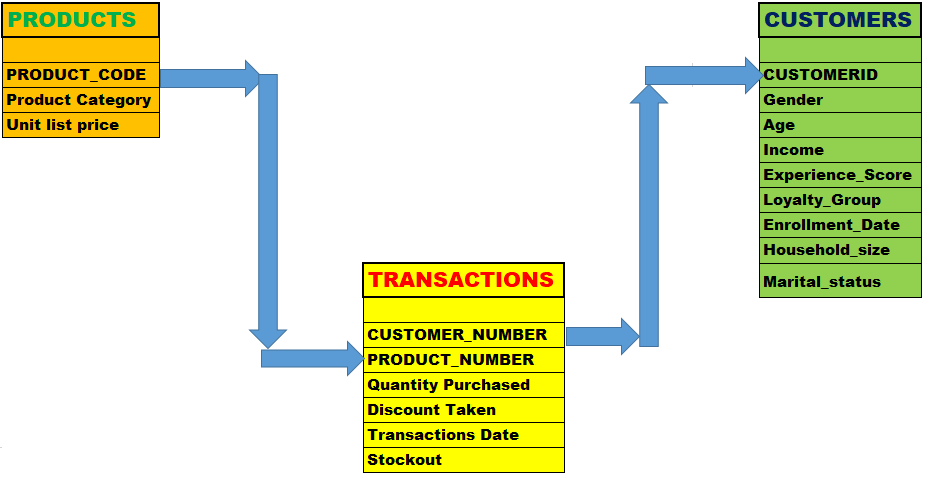

In [17]:
transactions_n_products_dataset=transactions_data.merge(products_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

# 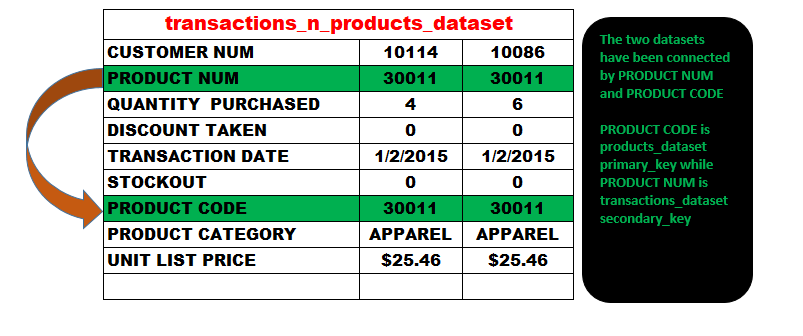

In [18]:
transactions_n_products_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
CUSTOMER NUM,10114,10086,10174,10401,10216,10204,10475,10493,10229,10494,...,10454,10018,10452,10469,10035,10325,10072,10337,10378,10090
PRODUCT NUM,30011,30011,30011,30011,30011,30011,30011,30011,30011,30011,...,30003,30003,30003,30003,30003,30003,30003,30003,30003,30003
QUANTITY PURCHASED,4,6,10,12,12,15,14,13,4,7,...,8,13,5,9,5,9,8,7,9,7
DISCOUNT TAKEN,0,0,0,0,0.1,0,0,0,0,0,...,0,0.2,0,0,0,0,0,0,0,0.1
TRANSACTION DATE,1/2/2015,1/2/2015,1/2/2015,1/2/2015,1/2/2015,1/2/2015,1/2/2015,1/2/2015,1/3/2015,1/3/2015,...,11/30/2015,12/1/2015,12/2/2015,12/7/2015,12/11/2015,12/11/2015,12/15/2015,12/29/2015,12/30/2015,12/31/2015
STOCKOUT,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
PRODUCT CODE,30011,30011,30011,30011,30011,30011,30011,30011,30011,30011,...,30003,30003,30003,30003,30003,30003,30003,30003,30003,30003
PRODUCT CATEGORY,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,APPAREL,...,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY,HEALTH & BEAUTY
UNIT LIST PRICE,$25.46,$25.46,$25.46,$25.46,$25.46,$25.46,$25.46,$25.46,$25.46,$25.46,...,$5.49,$5.49,$5.49,$5.49,$5.49,$5.49,$5.49,$5.49,$5.49,$5.49


In [19]:
transactions_n_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMER NUM        10000 non-null  int64  
 1   PRODUCT NUM         10000 non-null  int64  
 2   QUANTITY PURCHASED  10000 non-null  int64  
 3   DISCOUNT TAKEN      10000 non-null  float64
 4   TRANSACTION DATE    10000 non-null  object 
 5   STOCKOUT            10000 non-null  int64  
 6   PRODUCT CODE        10000 non-null  int64  
 7   PRODUCT CATEGORY    10000 non-null  object 
 8   UNIT LIST PRICE     10000 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB


####  We need to convert UNIT LIST PRICE from object to floating point value and get rid of the dollar sign using the map() function

In [20]:
# Remove the dollar sign
transactions_n_products_dataset['UNIT LIST PRICE'] = transactions_n_products_dataset['UNIT LIST PRICE'].map(lambda x : float(x.replace('$', '')))


In [21]:
transactions_n_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CUSTOMER NUM        10000 non-null  int64  
 1   PRODUCT NUM         10000 non-null  int64  
 2   QUANTITY PURCHASED  10000 non-null  int64  
 3   DISCOUNT TAKEN      10000 non-null  float64
 4   TRANSACTION DATE    10000 non-null  object 
 5   STOCKOUT            10000 non-null  int64  
 6   PRODUCT CODE        10000 non-null  int64  
 7   PRODUCT CATEGORY    10000 non-null  object 
 8   UNIT LIST PRICE     10000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.1+ MB


#### Get the total_amount_paid by the customers . We just need to multiply  quantity purchaced * unit price list * percentage discount

In [22]:
transactions_n_products_dataset['TOTAL_AMOUNT_PAID']=transactions_n_products_dataset['QUANTITY PURCHASED'] * transactions_n_products_dataset['UNIT LIST PRICE'] * (1- transactions_n_products_dataset['DISCOUNT TAKEN'])
transactions_n_products_dataset

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL_AMOUNT_PAID
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968
...,...,...,...,...,...,...,...,...,...,...
9995,10325,30003,9,0.0,12/11/2015,0,30003,HEALTH & BEAUTY,5.49,49.410
9996,10072,30003,8,0.0,12/15/2015,0,30003,HEALTH & BEAUTY,5.49,43.920
9997,10337,30003,7,0.0,12/29/2015,0,30003,HEALTH & BEAUTY,5.49,38.430
9998,10378,30003,9,0.0,12/30/2015,0,30003,HEALTH & BEAUTY,5.49,49.410


#### We want to know what each customer shoped for. We do this by grouping the datapoints by customer number and product category and then aggregating the total amount paid

In [23]:
customer_shopping_dataset=transactions_n_products_dataset.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'TOTAL_AMOUNT_PAID':'sum'})
customer_shopping_dataset.T

CUSTOMER NUM         10001                                         10002  \
PRODUCT CATEGORY   APPAREL ELECTRONICS    FOOD HEALTH & BEAUTY   APPAREL   
TOTAL_AMOUNT_PAID  4022.43    1601.315  68.688        1134.337  2312.509   

CUSTOMER NUM                               10003                      ...  \
PRODUCT CATEGORY  ELECTRONICS     FOOD   APPAREL ELECTRONICS    FOOD  ...   
TOTAL_AMOUNT_PAID    2473.163  276.779  2887.382    5414.418  260.64  ...   

CUSTOMER NUM         10497                     10498                       \
PRODUCT CATEGORY      FOOD HEALTH & BEAUTY   APPAREL ELECTRONICS     FOOD   
TOTAL_AMOUNT_PAID  420.912         172.945  1723.623     3424.11  783.588   

CUSTOMER NUM                                10499     10500              \
PRODUCT CATEGORY  HEALTH & BEAUTY HEALTH & BEAUTY   APPAREL ELECTRONICS   
TOTAL_AMOUNT_PAID         320.145           20.01  1511.748    2632.269   

CUSTOMER NUM               
PRODUCT CATEGORY     FOOD  
TOTAL_AMOUNT_PAID  38.015  

[1 rows x 1427 columns]

#### To populate the customer numbers, we need to reset the index 

In [24]:
customer_shopping_dataset=customer_shopping_dataset.reset_index()
customer_shopping_dataset

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL_AMOUNT_PAID
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509
...,...,...,...
1422,10498,HEALTH & BEAUTY,320.145
1423,10499,HEALTH & BEAUTY,20.010
1424,10500,APPAREL,1511.748
1425,10500,ELECTRONICS,2632.269


#### Create a pivot table for a better display of the data

In [25]:
customer_shopping_pivot_table=customer_shopping_dataset.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='TOTAL_AMOUNT_PAID')
customer_shopping_pivot_table

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN
...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780
10497,3404.527,5905.274,420.912,172.945
10498,1723.623,3424.110,783.588,320.145


#### Aggregate the total amount spent by the customer for shopping as TOTAL_EXPENDITURE

In [26]:
customers_total_expenditure = customer_shopping_dataset.groupby('CUSTOMER NUM').agg({'TOTAL_AMOUNT_PAID':'sum'}).rename(columns={'TOTAL_AMOUNT_PAID':'TOTAL_EXPENDITURE'})
customers_total_expenditure

,TOTAL_EXPENDITURE
CUSTOMER NUM,
10001,6826.770
10002,5062.451
10003,8562.440
10004,5522.694
10005,213.512
...,...
10496,8501.464
10497,9903.658
10498,6251.466


#### Merge the customers total expenditure with the shopping pivot table

In [27]:
customer_transactions = customer_shopping_pivot_table.merge(customers_total_expenditure, how='inner', left_index=True, right_index=True)
customer_transactions

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL_EXPENDITURE
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,NaN,5062.451
10003,2887.382,5414.418,260.640,NaN,8562.440
10004,3637.213,1840.211,45.270,NaN,5522.694
10005,213.512,NaN,NaN,NaN,213.512
...,...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780,8501.464
10497,3404.527,5905.274,420.912,172.945,9903.658
10498,1723.623,3424.110,783.588,320.145,6251.466


#### We need to get rid of NaN / Empty values by assigning them to zeros using the fillna(0) function with 0 as a parameter

In [28]:
customer_transactions = customer_transactions.fillna(0)
customer_transactions

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL_EXPENDITURE
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,0.000,5062.451
10003,2887.382,5414.418,260.640,0.000,8562.440
10004,3637.213,1840.211,45.270,0.000,5522.694
10005,213.512,0.000,0.000,0.000,213.512
...,...,...,...,...,...
10496,4611.468,3616.106,186.110,87.780,8501.464
10497,3404.527,5905.274,420.912,172.945,9903.658
10498,1723.623,3424.110,783.588,320.145,6251.466


#### We should now merge the customer_transactions with customer data and come up with a customers_n_transactions_dataset.  

In [29]:
customers_n_transactions_dataset = customers_data.merge(customer_transactions, how='inner', left_on='CUSTOMERID', right_index=True)
customers_n_transactions_dataset  

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL_EXPENDITURE
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10496,0,47,113125,7,enrolled,23-01-2014,2,Single,4611.468,3616.106,186.110,87.780,8501.464
496,10497,0,49,118108,7,enrolled,01-10-2007,1,Single,3404.527,5905.274,420.912,172.945,9903.658
497,10498,0,42,97353,8,enrolled,21-05-2009,5,Married,1723.623,3424.110,783.588,320.145,6251.466
498,10499,1,22,34424,1,notenrolled,NaN,2,Single,0.000,0.000,0.000,20.010,20.010


## We now have a clean dataset that we can use for clustering 

#### Take the Income and Total_expenditure as the clustering datapoints to understand consumer spending behaviour given their incomes 

In [30]:
# Value 3 denotes column index 3[income] and 13 denotes column index 13[Total_expenditure]
X = customers_n_transactions_dataset.iloc[:,[3,13] ].values
print(X)

[[1.3349800e+05 6.8267700e+03]
 [9.4475000e+04 5.0624510e+03]
 [8.8610000e+04 8.5624400e+03]
 [8.4313000e+04 5.5226940e+03]
 [5.1498000e+04 2.1351200e+02]
 [1.3289300e+05 5.2348470e+03]
 [6.5002000e+04 5.2246160e+03]
 [1.1567200e+05 8.4120010e+03]
 [1.0174100e+05 9.1165760e+03]
 [7.6994000e+04 6.6201470e+03]
 [2.0256000e+04 1.4968710e+03]
 [1.0180500e+05 2.9310000e+02]
 [8.8829000e+04 4.6859020e+03]
 [8.8833000e+04 6.6981900e+03]
 [5.7251000e+04 7.3989530e+03]
 [8.6025000e+04 6.0462100e+03]
 [8.9059000e+04 1.3715841e+04]
 [1.1203500e+05 4.2428890e+03]
 [1.3712800e+05 8.0211600e+03]
 [5.9964000e+04 4.3067760e+03]
 [1.0596400e+05 5.9573150e+03]
 [1.1093400e+05 8.2011340e+03]
 [1.2194000e+05 5.5376170e+03]
 [5.1529000e+04 2.8842200e+03]
 [1.1319000e+05 1.3370100e+04]
 [1.2309400e+05 1.0133207e+04]
 [6.5174000e+04 9.6441840e+03]
 [2.2972000e+04 3.5110000e+01]
 [3.2168000e+04 3.0075260e+03]
 [1.4410800e+05 6.8665840e+03]
 [6.9519000e+04 2.7002260e+03]
 [2.0447000e+04 2.0855890e+03]
 [3.9485

### Use Within-Cluster-Sum-of-Squares (WCSS)  to find the ideal number of clusters

In [31]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Plot an elbow graph. The elbow point at x-axis is the ideal number of clusters 

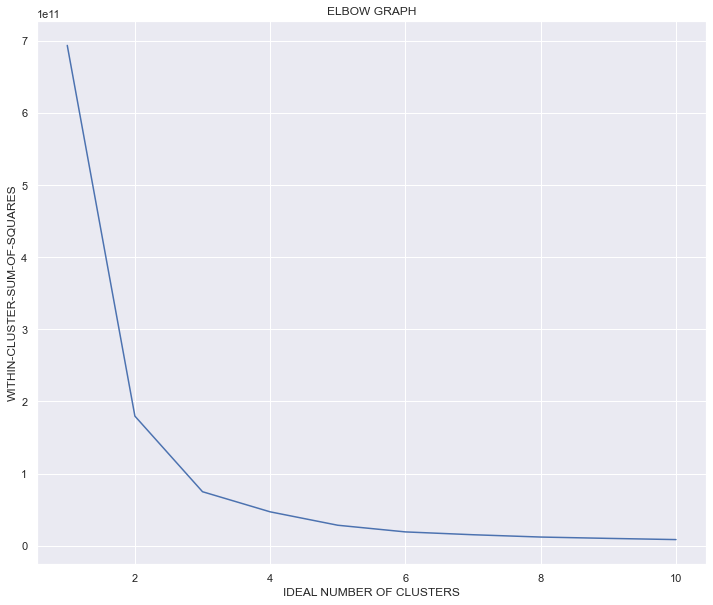

In [32]:
sns.set(rc={'figure.figsize': (12, 10)})
plt.plot(range(1,11), wcss)
plt.title("ELBOW GRAPH")
plt.xlabel("IDEAL NUMBER OF CLUSTERS")
plt.ylabel("WITHIN-CLUSTER-SUM-OF-SQUARES")
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[0 2 2 2 1 0 2 0 2 2 1 2 2 2 1 2 2 0 0 1 0 0 0 1 0 0 2 1 1 0 2 1 1 2 1 1 1
 0 0 1 1 2 2 2 0 1 1 2 0 1 0 1 1 1 2 1 0 0 0 1 2 0 0 0 0 2 2 0 1 2 2 1 1 2
 0 1 2 1 2 0 2 0 0 0 1 2 0 1 2 1 0 0 0 0 0 2 2 1 0 0 1 1 1 1 2 2 0 1 2 1 1
 1 2 1 2 1 0 0 2 2 1 2 0 1 2 2 0 2 1 0 2 2 1 2 0 2 0 0 0 2 2 1 1 1 2 0 2 1
 2 2 2 0 0 0 2 2 1 1 0 1 0 1 0 0 1 2 1 0 2 1 0 1 0 2 0 1 0 0 2 1 0 1 2 1 0
 0 0 0 1 0 1 0 0 0 2 0 0 0 0 2 2 1 0 0 2 1 2 0 0 0 0 1 0 2 0 0 1 2 2 1 2 1
 0 1 1 1 0 1 1 2 2 2 0 2 2 1 0 0 1 1 1 1 2 2 2 1 0 0 0 1 1 0 1 0 1 2 1 0 2
 2 1 0 1 2 2 0 2 2 1 0 0 1 0 1 1 1 0 2 0 0 2 2 2 2 0 2 0 2 0 0 0 1 1 0 1 1
 1 1 2 2 1 2 2 0 1 0 1 1 0 1 1 2 2 2 2 2 1 0 2 1 2 2 1 2 1 1 2 1 0 1 1 0 1
 2 2 1 1 0 2 0 2 0 0 2 2 0 2 0 0 2 1 2 1 0 0 0 0 2 1 2 0 2 1 0 2 1 2 0 0 2
 0 2 2 0 2 0 0 2 1 2 2 1 1 1 0 2 1 2 0 1 0 1 2 0 1 0 0 2 0 2 0 0 1 1 0 2 1
 0 2 2 0 2 1 2 0 1 0 0 0 1 1 2 2 2 0 2 0 0 2 1 0 2 2 1 0 2 0 0 2 2 0 1 1 0
 1 2 0 1 1 2 1 1 1 1 0 2 0 0 2 1 0 2 0 2 0 0 2 1 1 0 0 2 0 0 0 2 2 2 1 1 1
 0 0 0 2 1 2 1 0 0 2 2 0 

### Visualizing all the clusters and plotting all their centroids

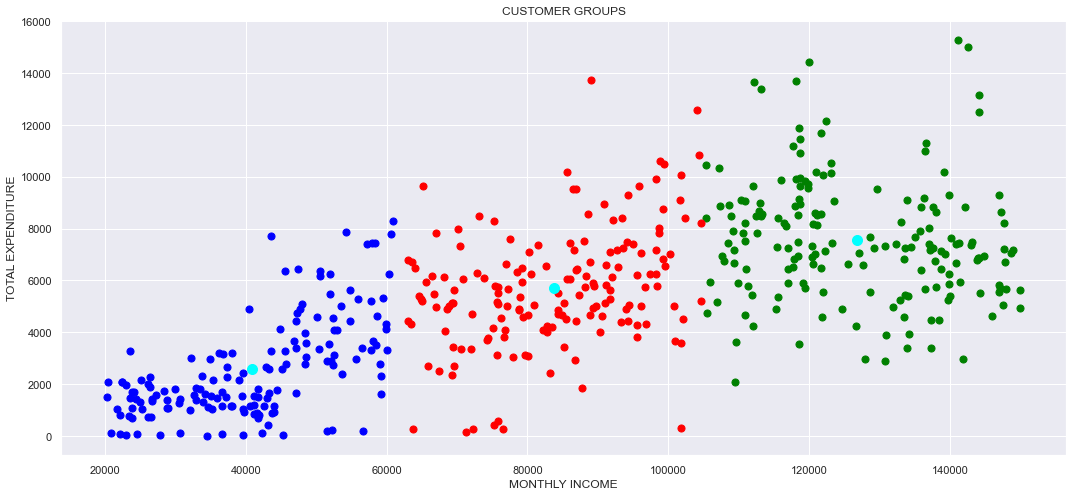

In [35]:
plt.figure(figsize = (18,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s=50, c='green')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50, c='blue')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50, c='red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')

plt.title("CUSTOMER GROUPS")
plt.xlabel("MONTHLY INCOME")
plt.ylabel("TOTAL EXPENDITURE")
plt.show()